# Import all required Libraries  in the first python cell not separate cells (1 mark). 


In [44]:
# Update the first cell to include these imports
import pandas as pd
import numpy as np
from pathlib import Path
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Add these Keras/TensorFlow imports
import tensorflow as tf
from tensorflow.keras import models, layers

# Load and read dataset and Display first 5 records in only second python cell (1 marks)

In [45]:
# Path to your dataset
dataset_path = Path('dataset/train.csv')  # Adjust if the filename is different

try:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("\nAvailable files in dataset folder:")
    dataset_dir = Path('dataset')
    if dataset_dir.exists():
        for file in dataset_dir.glob('*'):
            print(f"- {file.name}")
    else:
        print("'dataset' folder not found in the current directory.")
        print("Current directory contents:", list(Path('.').glob('*')))

Dataset loaded successfully!
Shape: (593994, 13)

First 5 rows:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


# Display dataset shape (total rows and colums), Uniques values for target feature, Sum of missing values if all colums. (1.5 marks) in only third python cell

In [46]:
print(f"Dataset shape (rows and columns): \n {df.shape}")
print(f"Dataset Target unique values: \n {df.loan_paid_back.unique()}")
print(f"Dataset sum of null values: \n {df.isnull().sum()}")

Dataset shape (rows and columns): 
 (593994, 13)
Dataset Target unique values: 
 [1. 0.]
Dataset sum of null values: 
 id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


# Target Distribution in forth python cell. (1 mark)

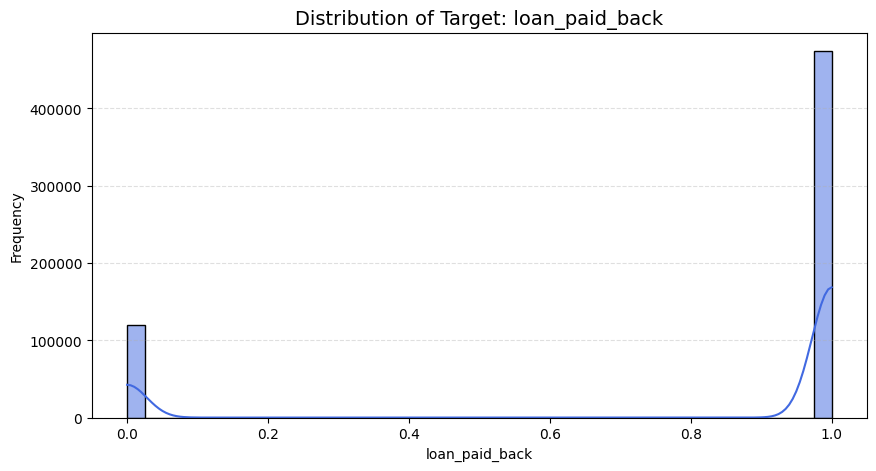

In [47]:
target = "loan_paid_back"
plt.figure(figsize=(10, 5))
sns.histplot(df[target], kde=True, bins=40, color="royalblue")
plt.title(f"Distribution of Target: {target}", fontsize=14)
plt.xlabel(target)
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### By Using IQR do the following:
# Detect and display total outliers
# display outliers appear in each numeric columns
# Display rows with at least one outlier
# Display all outliers in dataframe.

### Total Marks: (2 marks). In Firth Python Cell

In [48]:
# 1️ Select numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Replace missing numeric values with median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# 2️ Compute IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3️ Detect outliers (boolean mask)
outlier_mask = (df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)

# 4️ Total number of outlier values
total_outliers = outlier_mask.sum().sum()
print(f"Detected {total_outliers} outlier values (IQR Method)\n")

# 5️ Outlier count *per column*
outliers_per_column = outlier_mask.sum().sort_values(ascending=False)
print(" Outliers per Column:\n")
print(outliers_per_column)

# Display as nice dataframe
display(pd.DataFrame({
    "Feature": outliers_per_column.index,
    "Outlier Count": outliers_per_column.values
}))

# 6️ Rows containing at least one outlier
outlier_rows = df[outlier_mask.any(axis=1)]
print(f"\nNumber of rows containing at least one outlier: {len(outlier_rows)}\n")

display(outlier_rows)


Detected 166912 outlier values (IQR Method)

 Outliers per Column:

loan_paid_back          119500
debt_to_income_ratio     17556
annual_income            15917
credit_score              5901
interest_rate             5136
loan_amount               2902
id                           0
dtype: int64


,Feature,Outlier Count
0,loan_paid_back,119500
1,debt_to_income_ratio,17556
2,annual_income,15917
3,credit_score,5901
4,interest_rate,5136
5,loan_amount,2902
6,id,0



Number of rows containing at least one outlier: 148757



,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
14,14,22790.15,0.083,665,3363.68,13.44,Male,Married,Bachelor's,Unemployed,Debt consolidation,D1,0.0
17,17,35268.70,0.089,576,23642.37,12.60,Male,Married,Bachelor's,Unemployed,Debt consolidation,F5,0.0
22,22,135416.72,0.160,661,12404.14,13.30,Male,Single,High School,Unemployed,Debt consolidation,D1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593970,593970,67431.54,0.180,651,18194.92,11.32,Female,Single,High School,Employed,Debt consolidation,D2,0.0
593971,593971,52448.82,0.091,689,12665.17,10.45,Female,Single,High School,Unemployed,Other,C3,0.0
593975,593975,175420.60,0.279,669,4787.21,9.08,Female,Single,High School,Employed,Education,D3,1.0
593980,593980,24990.57,0.142,627,17196.50,13.79,Male,Married,High School,Employed,Business,D4,0.0


# Plot outliers on BOX Plot in Sixth python cell. (1 Marks)

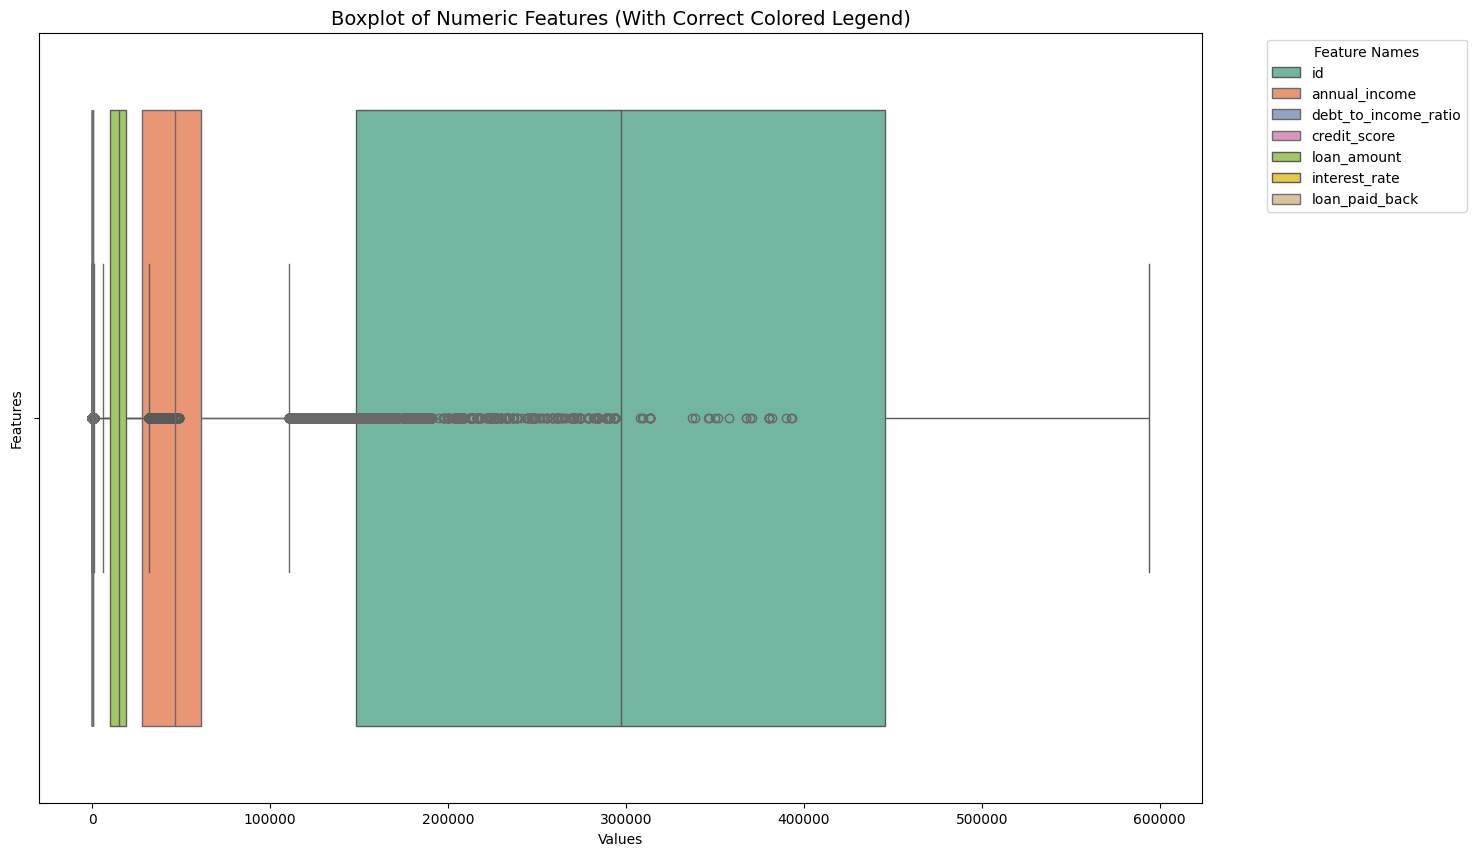

In [49]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

# Generate a unique color for each feature
palette = sns.color_palette("Set2", n_colors=len(numeric_cols))

# Plot each column separately with a unique color + label
for idx, col in enumerate(numeric_cols):
    sns.boxplot(
        x=df[col],
        orient='h',
        color=palette[idx],
        label=col
    )

plt.title("Boxplot of Numeric Features (With Correct Colored Legend)", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")

plt.legend(
    title="Feature Names",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.show()


# REMOVING all Detected OUTLIERS and Display the remaining Dataframe shape. in Seventh Python cell. (1 marks)

In [50]:
# REMOVE A DETECTED OUTLIERS
# First Way
# df = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]
# print(f"Data shape after outlier removal: {df.shape}")
# Second Way
mask = (df[num_cols] >= lower_bound) & (df[num_cols] <= upper_bound)

df = df[mask.all(axis=1)]
print(f"Data shape after outlier removal: {df.shape}")

Data shape after outlier removal: (445237, 13)


# Correlation Matrix using heapmap in 8th python cell (1 marks)

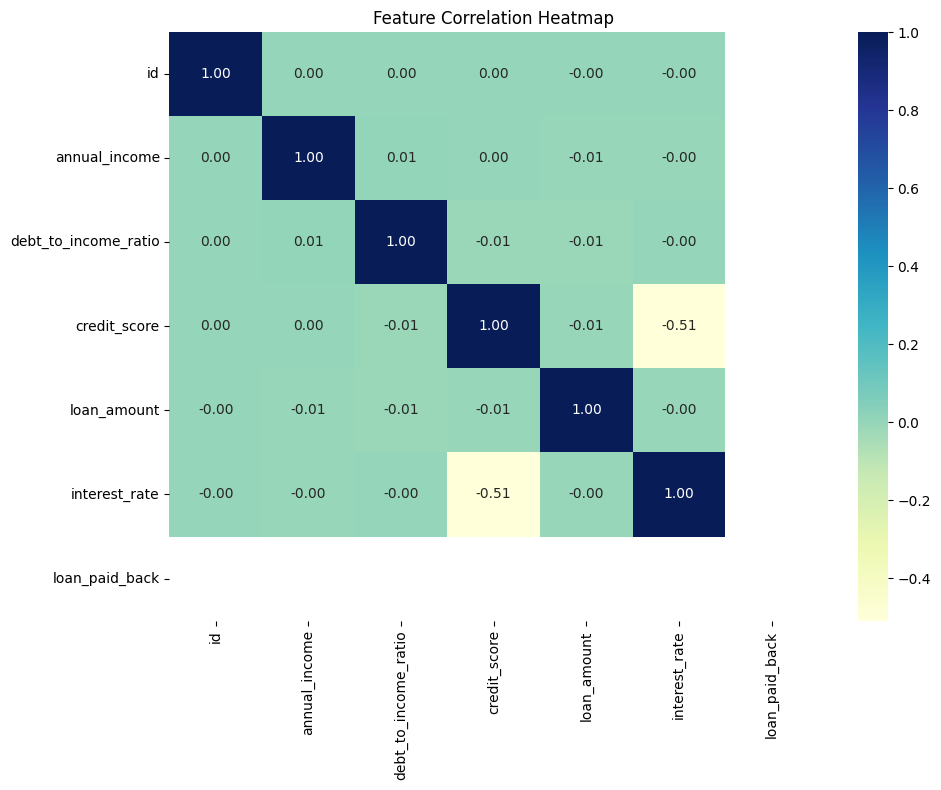

In [51]:
corr_matrix = df.corr(numeric_only=True)
#  Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Droping feature which is colled id. in 9th cell. (0.5 marks)

In [52]:
df = df.drop(columns=['id'], axis=1)

# Display only all categorical features 

# Transforming All Categorical Features Into Label Encoder and display the first 5 records in updated dataframe. (3 marks) 0.5 for each feature. N.B: no need to create new features. Only the transformed values must updated the old values/categories.

## 10th python cell

In [53]:
# Replace your current encoding code with this:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Only remove 'loan_paid_back' if it exists in the list
if 'loan_paid_back' in categorical_cols:
    categorical_cols.remove('loan_paid_back')  # Don't encode the target variable

print(f"Categorical columns to encode: {categorical_cols}")

# Create a separate encoder for each column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save each encoder separately

print("Label encoding applied to:", list(categorical_cols))
print("Encoders saved for:", list(label_encoders.keys()))
df.head()

Categorical columns to encode: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
Label encoding applied to: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
Encoders saved for: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,0,2,1,2,6,12,1.0
2,49566.20,0.097,694,17005.15,9.76,1,2,1,0,2,14,1.0
4,25496.70,0.053,665,12184.43,10.21,1,1,1,0,6,15,1.0
5,44940.30,0.058,653,12159.92,12.24,1,2,0,0,6,15,1.0
6,61574.16,0.042,696,16907.71,13.52,2,2,1,2,2,14,1.0


# Feature Spliting. (1 marks)
## 11th python cell

In [54]:
X = df.drop('loan_paid_back', axis=1)
y = df['loan_paid_back']

# DATASET SPLITTING (TRAIN (80%) and TEST (20%) ) and handle class imbalance with stratify parameter and use random state of 42. and display shape of train and test samples.

## (2 marks)

## 12th pthon cell.

N.B: 
Notice 1. Please compare sum of train and test samples if are equal to final dataframe achieved in 7th python cell but different to samples obtained in 3rd python cell then proceed with the  next steps.

Notice 2. Once all cells samples are equal you have a problem. recheck your codes until the 1 notice is verified. Then proceed with further steps.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Train sample: {X_train.shape} \n Test Samples: {X_test.shape}")

Train sample: (356189, 11) 
 Test Samples: (89048, 11)


# Feature Scaling to prevent Data Leakage problem.

## in 13th python cell

# (1 marks)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buuild Random Forest Classifier

<h1 style="color:red">This cell will not be considered during Marking</h1>

In [57]:
model_r = RandomForestClassifier(n_estimators=2000)
model_r.fit(X_train_scaled, y_train)
y_pred = model_r.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


# Now our input feature in X_train_scaled obtained from the prevention of data leakage. In your network you need to use it as input feature. if you use X_train. the rest codes and results will not be evaluated. Now do the following:


# 1. (3 marks) 
BUILD Artificial Neural Network with parameters you want and makesure it will produce the best results that can be reported during model deployment. Remember to use appropriete activation function correspond to our problem.
# 2. (3 marks) 
Compile your model with Adam optimizer and loss which correspond to the kind of this problem and metrics of accuracy.

# 3. (1 mark)
Show model summary.



## in 14th cell

In [58]:
input_dim = X_train_scaled.shape[1]   # should be 11

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')   # 1 neuron + sigmoid for binary
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 320 (1.25 KB)

# 1. (3 marks)
implement Train with early stopping to control overfitting for your ANN and use patience from your choice, monitor validation loss and restore best weigth to True.

# 2. (3 marks)

Train your ANN model by setting these parameters from your choice:

a. epochs
b. validation_split
c. batch_size
d. callbacks
e. verbose

And remember you need also to train: X_train_scaled, y_train, as our input
N.B: do not hestate to try other parameters can can help your model to converge with perfect results.

## 15th python cell

In [59]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=1024,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9493 - loss: 0.2484 - val_accuracy: 1.0000 - val_loss: 0.0355
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 8.7695e-04 - val_accuracy: 1.0000 - val_loss: 7.1441e-04
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 5.9987e-04 - val_accuracy: 1.0000 - val_loss: 5.0153e-04
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 4.2936

# (5 marks. 2.5 marks for each)
Make model Evaluation on both  train and  test Accuracy.

## 16 pthon cell

In [60]:
# Train performance
train_loss, train_acc = model.evaluate(
    X_train_scaled,
    y_train,                 # ✔ Direct numeric target (0/1)
    verbose=0
)

# Test performance
test_loss, test_acc = model.evaluate(
    X_test_scaled,
    y_test,                 # ✔ Direct numeric target (0/1)
    verbose=0
)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")


Train accuracy: 1.0000
Test  accuracy: 1.0000


# 1. (2 Marks)
# GET PREDICTION FROM OUR ANN MODEL
 ### Convert Model Probabilities Into Binary Class Predictions
 ## a threshold is 0.5


 # 17th cell

In [61]:
# Predict probabilities (sigmoid output)
y_pred_proba = model.predict(X_test_scaled)

# Convert probability → class label (0/1)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()


2783/2783 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


## Create Actual vs Predicted Table/Dataframe For Model Results Analysis and Interpretation

1. Actual 
2. Predicted
3. Probabilities

## Display all above values in Table/Dataframe of top 20 records. (3 marks. 1 marks for each).

# In 18th cell

In [62]:
# Convert Series → NumPy array
y_test_array = y_test.to_numpy()

comparison_df = pd.DataFrame({
    "Actual": y_test_array,
    "Predicted": y_pred,
    "Predicted_Probability": y_pred_proba.flatten()
})

comparison_df.head(20)


,Actual,Predicted,Predicted_Probability
0,1.0,1,1.0
1,1.0,1,1.0
2,1.0,1,1.0
3,1.0,1,1.0
4,1.0,1,1.0
5,1.0,1,1.0
6,1.0,1,1.0
7,1.0,1,1.0
8,1.0,1,1.0
9,1.0,1,1.0


# Total Marks all step by step codebase: 40 marks

# Finally, The accuracy you will get will be a half of your marks.
# ( 50/100) Marks of your accuracy



# Total Marks: 90
# Average Marks: 30

<h1 style = "color: blue"> Good Luck</h1>

save all scaler and model

In [1]:
# Define the backend path
backend_path = r'C:\Users\user\loan pay back\backend'
os.makedirs(backend_path, exist_ok=True)

# 1. Save label encoders (already done earlier in encoding section)
encoders_file = os.path.join(backend_path, 'label_encoders.pkl')
joblib.dump(label_encoders, encoders_file)
print(f" Label encoders saved to: {encoders_file}")

# 2. Save the trained model
model_file = os.path.join(backend_path, 'model.pkl')
joblib.dump(model_r, model_file)
print(f" Model saved to: {model_file}")

# 3. Save the scaler
scaler_file = os.path.join(backend_path, 'scaler.pkl')
joblib.dump(scaler, scaler_file)
print(f" Scaler saved to: {scaler_file}")

# Verify all 3 files
print("\n All files in backend folder:")
print(f"1. Model: {os.path.exists(model_file)}")
print(f"2. Scaler: {os.path.exists(scaler_file)}")
print(f"3. Encoders: {os.path.exists(encoders_file)}")

NameError: name 'os' is not defined